In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Jadex\Downloads\amazon.csv', encoding = "ISO-8859-1")

In [3]:
#1. Display top 10 rows of the dataset.
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [4]:
#2. Check last 10 rows
df.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01
6448,2011,Tocantins,Dezembro,105.0,2011-01-01
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [5]:
#3. Find shape of the dataset (number of rows and number of columns).
shape = df.shape
print(f'number of rows : {shape[0]}')
print(f'number of columns : {shape[1]}')

number of rows : 6454
number of columns : 5


In [6]:
#4. Get information about the dataset like total number rows, total number of columns, datatypes of each column and memory requirement.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [7]:
#5. Check for duplicate data and drop them.
dupli = df.duplicated()
df.drop_duplicates(inplace=True)
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [8]:
#6. Check null values in the dataset.
null_cnt = df.isnull().sum()
null_cnt

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [9]:
#7. Get overall statistics about the dataframe.
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [10]:
#8. Rename month names to English.
month_map = {'Janeiro':'January', 'Feveriro':'February', 
             'Marco': 'March', 'Abril':'April', 'Maio':'May', 
             'Junho': 'June', 'Julho': 'July', 'Agosto':'August',
             'Setembro': 'September', 'Outubro': 'October', 
             'Novembro': 'November', 'Dezembro': 'December'}
df['month'] = df['month'].map(month_map)

In [11]:
#9. Get the total number of fires registered.
df.number.sum()

698811.073

In [12]:
#10. In which month maximum number of forest fires were reported?
pivot1 = pd.pivot_table(df,values='number',index=['month'],aggfunc=np.sum)
pivot1

,number
month,
April,28184.770
August,88050.435
December,57535.480
January,47681.844
July,92319.113
June,55997.675
May,34725.363
November,85508.054
October,88681.579


In [14]:
#11. In which year maximum number of forest fires was reported?
pivot2 = pd.pivot_table(df,values='number',index=['year'],aggfunc=np.sum)
pivot2

,number
year,
1998,20013.971
1999,26882.821
2000,27351.251
2001,29054.612
2002,37390.600
2003,42760.674
2004,38450.163
2005,35004.965
2006,33824.161


In [16]:
#12. In which state maximum number of forest fires was reported?
pivot3 = pd.pivot_table(df,values='number',index=['state'],aggfunc=np.sum)
pivot3

,number
state,
Acre,18464.030
Alagoas,4606.000
Amapa,21831.576
Amazonas,30650.129
Bahia,44746.226
Ceara,30428.063
Distrito Federal,3561.000
Espirito Santo,6546.000
Goias,37695.520


In [18]:
#13. Find total number of fires were reported in Amazonas.
amazonas_df = df[df['state'] == 'Amazonas']
total_fires = amazonas_df['number'].sum()
print('The total number of fires reported in Amazonas is', total_fires)

The total number of fires reported in Amazonas is 30650.129


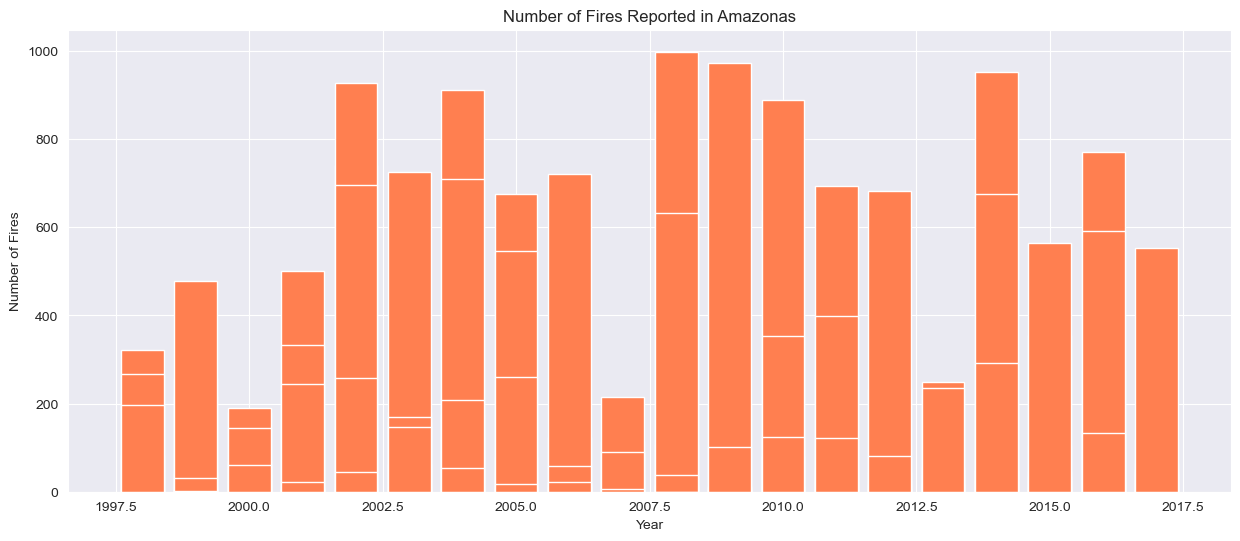

In [19]:
#14. Display number of fires were reported in Amazonas (year-wise).
mpl.figure(figsize=(15, 6))
sns.set_style('darkgrid')
mpl.bar(amazonas_df['year'], amazonas_df['number'], color = 'coral')
mpl.title('Number of Fires Reported in Amazonas')
mpl.xlabel('Year')
mpl.ylabel('Number of Fires')
mpl.show()

In [20]:
#15. Display number of fires were reported in Amazonas (day-wise).
amazonas = df[df['state']== 'Amazonas']
date_amazonas = amazonas.groupby('date')['number'].sum()
date_amazonas

date
1998-01-01     946.000
1999-01-01    1061.000
2000-01-01     853.000
2001-01-01    1297.000
2002-01-01    2852.000
2003-01-01    1524.268
2004-01-01    2298.207
2005-01-01    1657.128
2006-01-01     997.640
2007-01-01     589.601
2008-01-01    2717.000
2009-01-01    1320.601
2010-01-01    2324.508
2011-01-01    1652.538
2012-01-01    1110.641
2013-01-01     905.217
2014-01-01    2385.909
2015-01-01    1189.994
2016-01-01    2060.972
2017-01-01     906.905
Name: number, dtype: float64

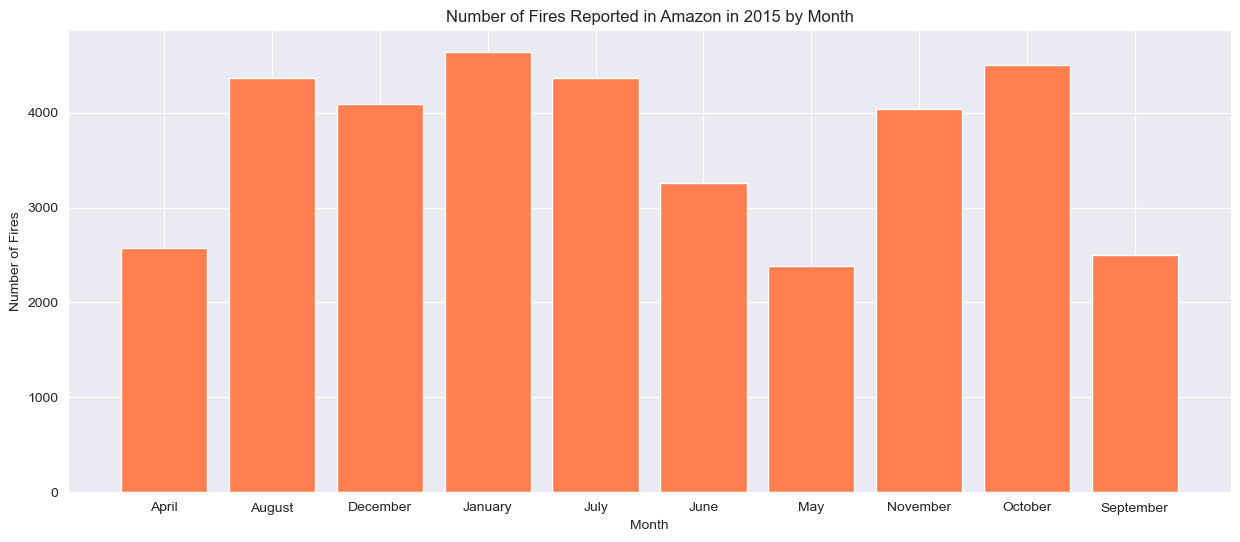

In [21]:
#16. Find total number of fires were reported in 2015 and visualize data based on each ‘month’.
df_2015 = df[df['year'] == 2015]
fires_month = df_2015.groupby('month')['number'].sum()
mpl.figure(figsize=(15, 6))
sns.set_style('darkgrid')
mpl.bar(fires_month.index, fires_month.values, color = 'coral')
mpl.title('Number of Fires Reported in Amazon in 2015 by Month')
mpl.xlabel('Month')
mpl.ylabel('Number of Fires')
mpl.show()

In [22]:
#18. Find average number of fires were reported from highest to lowest (state-wise).
state_ave = df.groupby('state')['number'].mean().reset_index()
state_ave = state_ave.sort_values(by='number', ascending=False)
state_ave

,state,number
20,Sao Paulo,213.896226
10,Mato Grosso,203.479975
4,Bahia,187.222703
15,Piau,158.174674
8,Goias,157.721841
11,Minas Gerais,156.800243
22,Tocantins,141.037176
3,Amazonas,128.243218
5,Ceara,127.314071
12,Paraiba,111.073979
